### compare with heuristic

In [1]:
import pandas as pd

file_path = 'result_heuristic\heu_100_25.csv'
columns_to_read = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
heu = pd.read_csv(file_path, usecols=columns_to_read)
print(heu.head())

file_path = 'result_gp\gp_avg_100_25.csv'
columns_to_read = ['fgp']
gp = pd.read_csv(file_path, usecols=columns_to_read)
print(gp.head())



      fheu1     fheu2     fheu3     fheu4     fheu5     fheu6
0  0.108013  0.202898  0.097481  0.342033  0.133154  0.192514
1  0.082600  0.193094  0.121708  0.203594  0.080387  0.199894
2  0.069819  0.205831  0.065768  0.205674  0.086222  0.204072
3  0.051066  0.205679  0.068162  0.210837  0.052216  0.204092
4  0.082399  0.323847  0.246478  0.240858  0.248068  0.230049
        fgp
0  0.129880
1  0.035934
2  0.035391
3  0.035578
4  0.108391


In [2]:
import pandas as pd

file_path = 'result_heuristic\heu_100_25.csv'
columns_to_read = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
heu = pd.read_csv(file_path, usecols=columns_to_read)
print(heu.head())

file_path = 'result_gp\gp_avg_100_25.csv'
columns_to_read = ['fgp']
gp = pd.read_csv(file_path, usecols=columns_to_read)
print(gp.head())

for name in heu.columns:
    comparison_bad = gp['fgp'] > heu[name]
    comparison_equal = gp['fgp'] == heu[name]
    comparison_good = gp['fgp'] < heu[name]

    count_bad = sum(comparison_bad)
    count_equal = sum(comparison_equal)
    count_good = sum(comparison_good)

    percent_improve = ((heu[name] - gp['fgp']) / heu[name]) * 100

    percent_improve_good = percent_improve[comparison_good]

    if len(percent_improve_good) > 0:
        mean_percent_improve = percent_improve_good.mean()
    else:
        mean_percent_improve = 0  

    print(f"{name}: good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")


      fheu1     fheu2     fheu3     fheu4     fheu5     fheu6
0  0.108013  0.202898  0.097481  0.342033  0.133154  0.192514
1  0.082600  0.193094  0.121708  0.203594  0.080387  0.199894
2  0.069819  0.205831  0.065768  0.205674  0.086222  0.204072
3  0.051066  0.205679  0.068162  0.210837  0.052216  0.204092
4  0.082399  0.323847  0.246478  0.240858  0.248068  0.230049
        fgp
0  0.129880
1  0.035934
2  0.035391
3  0.035578
4  0.108391
 fheu1: good: 32 / equal: 0 / bad: 24 / mean improvement: 32.15%
 fheu2: good: 56 / equal: 0 / bad: 0 / mean improvement: 61.86%
 fheu3: good: 45 / equal: 0 / bad: 11 / mean improvement: 43.05%
 fheu4: good: 56 / equal: 0 / bad: 0 / mean improvement: 61.76%
 fheu5: good: 43 / equal: 0 / bad: 13 / mean improvement: 36.65%
 fheu6: good: 56 / equal: 0 / bad: 0 / mean improvement: 61.41%


ValueError: malformed node or string: 989.9800531180656

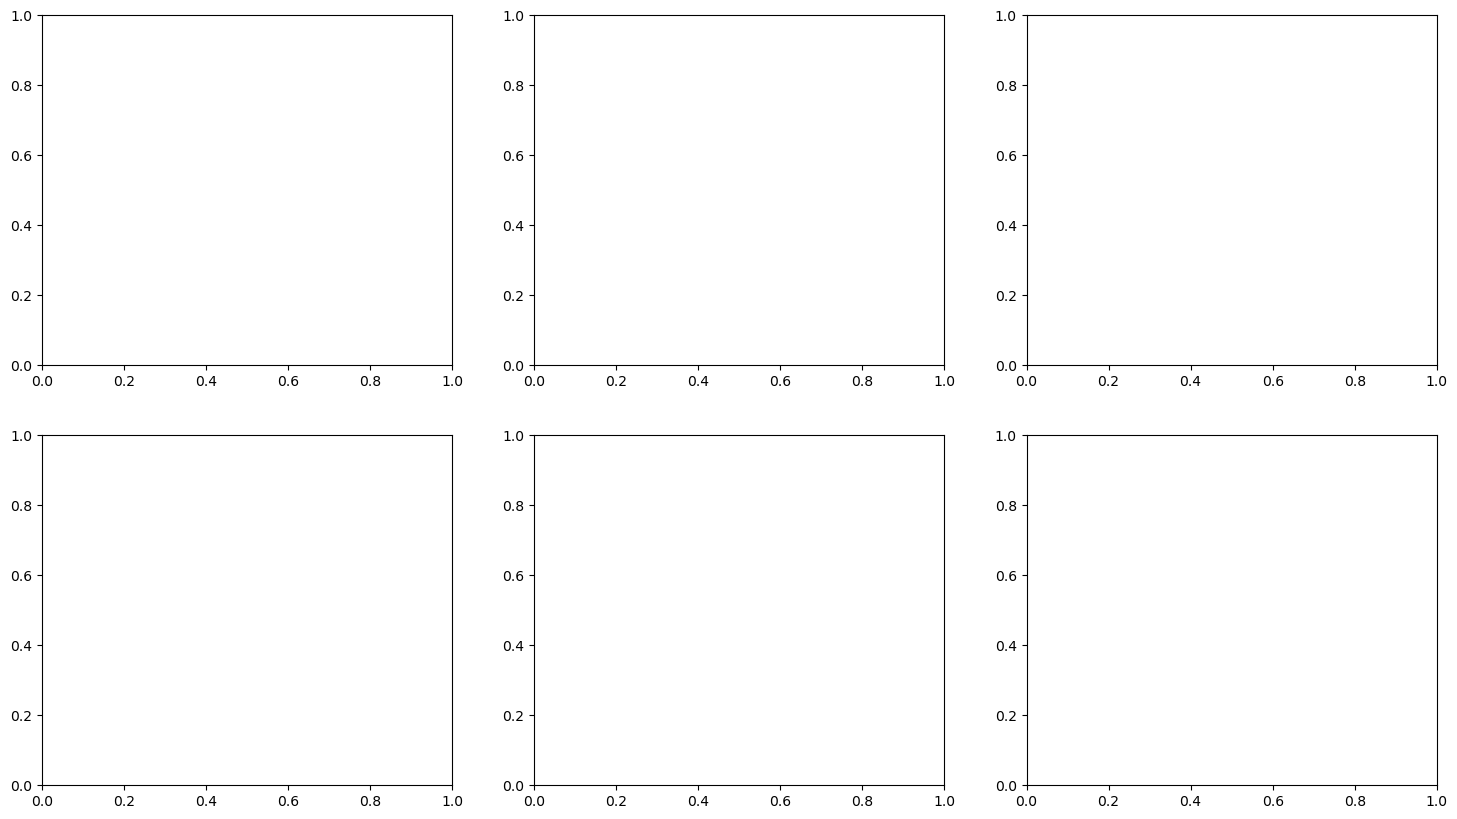

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# File paths and columns to read
file_paths_heu = ['result_heuristic\heu_100_3.csv', 'result_heuristic\heu_100_5.csv', 'result_heuristic\heu_100_10.csv', 'result_heuristic\heu_100_15.csv', 'result_heuristic\heu_100_25.csv']
columns_to_read_heu = [' carbon_heu1', ' carbon_heu2', ' carbon_heu3', ' carbon_heu4', ' carbon_heu5', ' carbon_heu6']
file_paths_gp = ['result_gp\gp_100_3.csv', 'result_gp\gp_100_5.csv', 'result_gp\gp_100_10.csv', 'result_gp\gp_100_15.csv', 'result_gp\gp_avg_100_25.csv', 'result_gp\gp_200_50.csv']
columns_to_read_gp = [' carbon']

# Initialize a figure for the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Read data and create plots
for i in range(len(file_paths_heu)):
    # Read heuristic data
    heu = pd.read_csv(file_paths_heu[i], usecols=columns_to_read_heu)
    
    # Read GP data
    gp = pd.read_csv(file_paths_gp[i], usecols=columns_to_read_gp)

    # Remove leading spaces from column names
    heu.columns = heu.columns.str.strip()
    gp.columns = gp.columns.str.strip()

    # Flatten lists and create plots for each heu column
    for j, column in enumerate(heu.columns):
        # Convert string representation of lists to actual lists
        heu[column] = heu[column].apply(ast.literal_eval)
        gp[' carbon'] = gp[' carbon'].apply(ast.literal_eval)

        # Extract individual carbon values
        heu_values = [value for sublist in heu[column] for value in sublist]
        gp_values = [value for sublist in gp[' carbon'] for value in sublist]

        # Create a dot plot for each heu column
        axes[j].scatter([f'heu_{i + 1}'] * len(heu_values), heu_values, label=f'Heuristic {column}', color='blue', alpha=0.6)
        axes[j].scatter([f'gp_{i + 1}'] * len(gp_values), gp_values, label='GP', color='orange', alpha=0.6)

        # Customize each subplot
        axes[j].set_title(f'Carbon Values for {column} vs. GP')
        axes[j].set_ylabel('Carbon Value')
        axes[j].set_xlabel('Instance')
        axes[j].legend()
        axes[j].grid()

# Adjust layout
plt.tight_layout()
plt.show()


#### each objective

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# File paths and columns to read
file_paths_heu = ['result_heuristic\heu_100_3.csv', 'result_heuristic\heu_100_5.csv', 'result_heuristic\heu_100_10.csv', 'result_heuristic\heu_100_15.csv', 'result_heuristic\heu_100_25.csv', 'result_heuristic\heu_200_50.csv']
# columns_to_read_heu = [' carbon_heu1', ' carbon_heu2', ' carbon_heu3', ' carbon_heu4', ' carbon_heu5', ' carbon_heu6']
columns_to_read_heu = [' reject_heu1', ' reject_heu2', ' reject_heu3', ' reject_heu4', ' reject_heu5', ' reject_heu6']
file_paths_gp = ['result_gp\gp_100_3.csv', 'result_gp\gp_100_5.csv', 'result_gp\gp_100_10.csv', 'result_gp\gp_100_15.csv', 'result_gp\gp_avg_100_25.csv', 'result_gp\gp_200_50.csv']
# columns_to_read_gp = [' carbon']
columns_to_read_gp = [' reject']

# Read heuristic data
heu = pd.read_csv(file_paths_heu[4], usecols=columns_to_read_heu)
heu_200 = pd.read_csv(file_paths_heu[5], usecols=columns_to_read_heu)
heu_all = pd.concat([heu, heu_200], axis=0).reset_index(drop=True)

# Read GP data
gp = pd.read_csv(file_paths_gp[4], usecols=columns_to_read_gp)
gp_200 = pd.read_csv(file_paths_gp[5], usecols=columns_to_read_gp)
gp_all = pd.concat([gp, gp_200], axis=0).reset_index(drop=True)

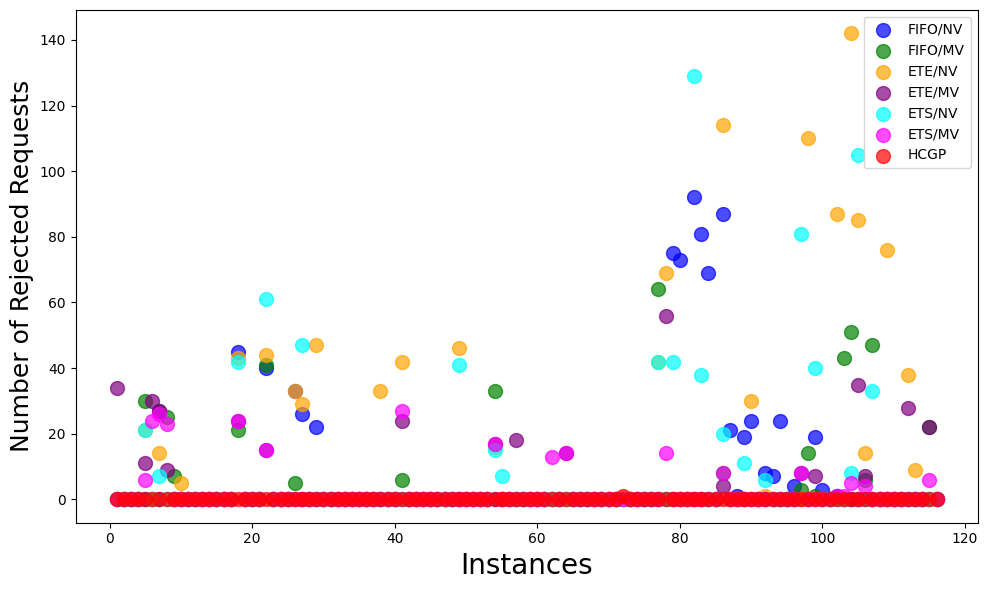

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the size of the figure
fig, ax = plt.subplots(figsize=(10, 6))
heu = heu_all
gp = gp_all
# Define colors and heuristic names
blue_colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
heuristic_name = ['FIFO/NV', 'FIFO/MV', 'ETE/NV', 'ETE/MV', 'ETS/NV', 'ETS/MV']

# Loop through each column to read from 'heu' and plot on the same plot
for i, r in enumerate(columns_to_read_heu):
    blue_values = heu[f'{r}']  # Assuming 'heu' is your DataFrame
    red_values = gp  # Assuming 'gp' is a list or array-like
    
    # Create categories from 1 to the length of the values
    categories = list(range(1, len(blue_values) + 1))
    
    # Plot blue dots with different colors for each heuristic
    ax.scatter(categories, blue_values, color=blue_colors[i % len(blue_colors)], s=100, alpha=0.7, label=heuristic_name[i])

ax.scatter(categories, red_values, color='red', s=100, alpha=0.7, label='HCGP')
ax.set_xlabel('Instances', fontsize=20)
ax.set_ylabel('Number of Rejected Requests', fontsize=18)
ax.legend()
plt.tight_layout()
# Save the figure as a PDF file
fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')

plt.show()


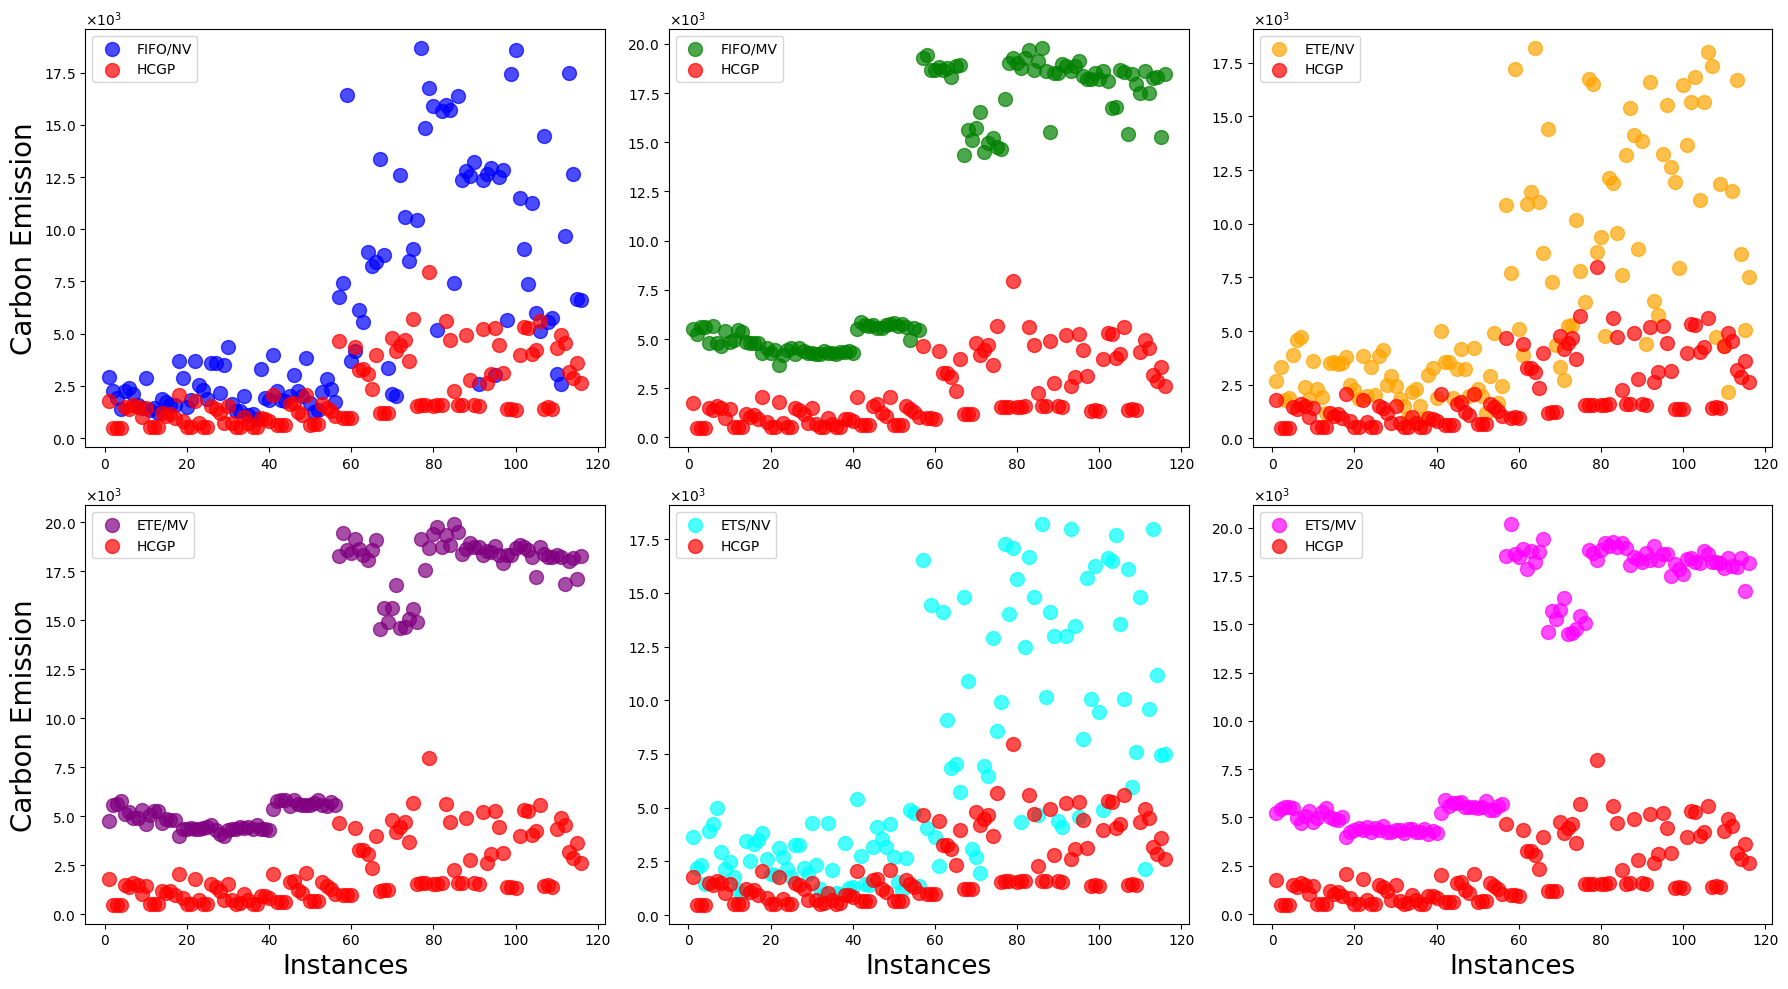

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 3
heu = heu_all
gp = gp_all

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 10))  # Adjust the size as needed

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Define a list of colors for the blue dots
blue_colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta']  # Extend as needed
heuristic_name = ['FIFO/NV', 'FIFO/MV', 'ETE/NV', 'ETE/MV', 'ETS/NV', 'ETS/MV']

# Loop through each column to read from 'heu'
for i, r in enumerate(columns_to_read_heu):
    blue_values = heu[f'{r}']  # Assuming 'heu' is your DataFrame
    red_values = gp  # Assuming 'gp' is a list or array-like

    # Create categories from 1 to the length of the values
    categories = list(range(1, len(blue_values) + 1))

    # Plot blue dots with different colors
    axs[i].scatter(categories, blue_values, color=blue_colors[i % len(blue_colors)], s=100, alpha=0.7, label=heuristic_name[i])

    # Plot red dots
    axs[i].scatter(categories, red_values, color='red', s=100, alpha=0.7, label='HCGP')

    # Adding titles and labels
    axs[3].set_xlabel('Instances', fontsize=19)
    axs[4].set_xlabel('Instances', fontsize=19)
    axs[5].set_xlabel('Instances', fontsize=19)
    axs[0].set_ylabel('Carbon Emission', fontsize=20)
    axs[3].set_ylabel('Carbon Emission', fontsize=20)

    # Set y-axis format to scientific with a multiplier of 10^3
    axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[i].ticklabel_format(axis='y', style='sci', scilimits=(3, 3))  # Ensure the exponent is set to 10^3

    # Display the grid
    axs[i].grid(axis='y', linestyle='')

    # Adding a legend
    axs[i].legend()

# Hide any unused subplots (if there are fewer than 6 categories)
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')  # Turn off the axis for unused subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a PDF file
fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')

# Show the combined plot
plt.show()


In [9]:

import pandas as pd

file_paths_heu = ['heu_100_3.csv', 'heu_100_5.csv', 'heu_100_10.csv', 'heu_100_15.csv', 'heu_100_25.csv']
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
file_paths_gp = ['gp_100_3.csv', 'gp_100_5.csv', 'gp_100_10.csv', 'gp_100_15.csv', 'gp_avg_100_25.csv']
columns_to_read_gp = [' fgp']
for i in range(len(file_paths_heu)):
    heu= pd.read_csv(file_paths_heu[i], usecols=columns_to_read_heu)
    # print(heu.head())
    gp = pd.read_csv(file_paths_gp[i], usecols=columns_to_read_gp)
    # print(gp.head())

    for name in heu.columns:
        comparison_bad = gp[' fgp'] > heu[name]
        comparison_equal = gp[' fgp'] == heu[name]
        comparison_good = gp[' fgp'] < heu[name]

        count_bad = sum(comparison_bad)
        count_equal = sum(comparison_equal)
        count_good = sum(comparison_good)

        percent_improve = ((heu[name] - gp[' fgp']) / heu[name]) * 100

        percent_improve_good = percent_improve[comparison_good]

        if len(percent_improve_good) > 0:
            mean_percent_improve = percent_improve_good.mean()
        else:
            mean_percent_improve = 0  

        print(f"{name}: good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")



 fheu1: good: 49 / equal: 0 / bad: 7 / mean improvement: 63.77%
 fheu2: good: 52 / equal: 0 / bad: 4 / mean improvement: 64.66%
 fheu3: good: 50 / equal: 0 / bad: 6 / mean improvement: 71.60%
 fheu4: good: 51 / equal: 0 / bad: 5 / mean improvement: 69.80%
 fheu5: good: 49 / equal: 0 / bad: 7 / mean improvement: 65.23%
 fheu6: good: 50 / equal: 0 / bad: 6 / mean improvement: 67.93%
 fheu1: good: 52 / equal: 0 / bad: 4 / mean improvement: 58.89%
 fheu2: good: 54 / equal: 0 / bad: 2 / mean improvement: 67.76%
 fheu3: good: 50 / equal: 0 / bad: 6 / mean improvement: 69.08%
 fheu4: good: 54 / equal: 0 / bad: 2 / mean improvement: 68.78%
 fheu5: good: 53 / equal: 0 / bad: 3 / mean improvement: 61.27%
 fheu6: good: 54 / equal: 0 / bad: 2 / mean improvement: 65.63%
 fheu1: good: 52 / equal: 0 / bad: 4 / mean improvement: 52.90%
 fheu2: good: 56 / equal: 0 / bad: 0 / mean improvement: 71.33%
 fheu3: good: 53 / equal: 0 / bad: 3 / mean improvement: 60.08%
 fheu4: good: 56 / equal: 0 / bad: 0 / m

#### Vehicle

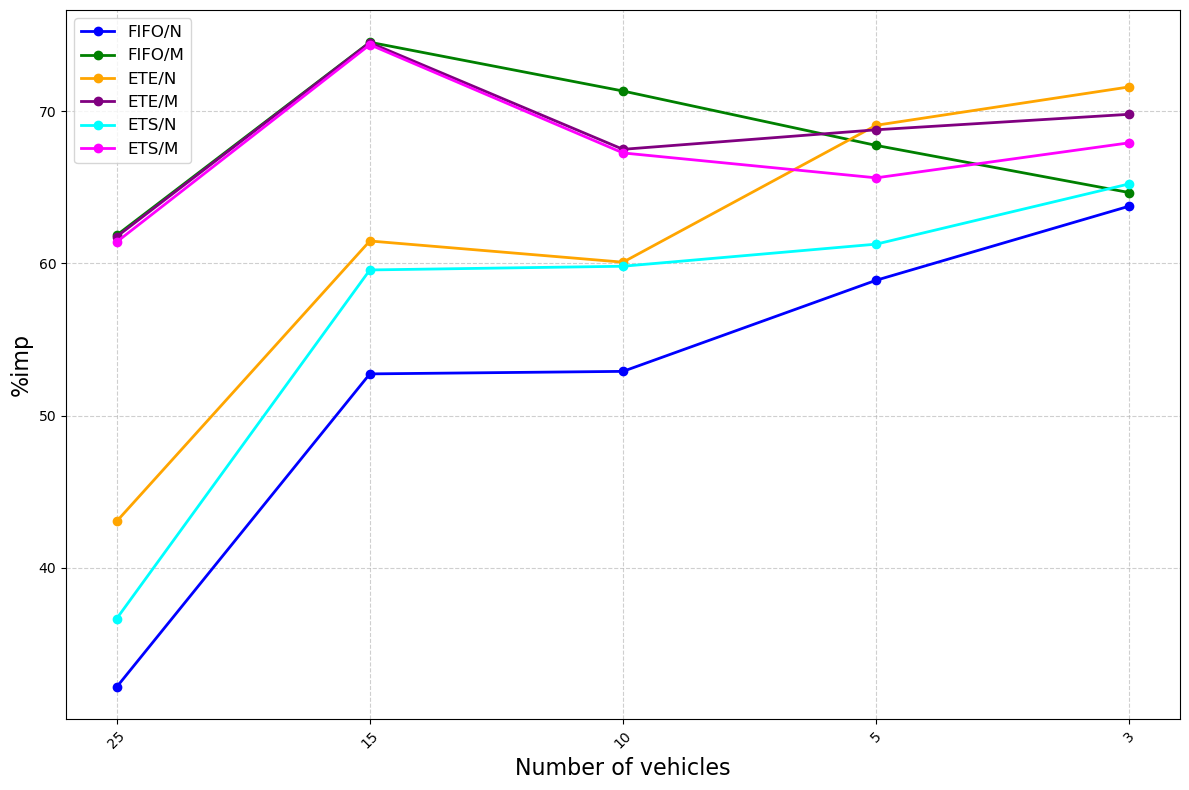

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths_heu = ['result_heuristic\\heu_100_25.csv', 'result_heuristic\\heu_100_15.csv', 'result_heuristic\\heu_100_10.csv', 'result_heuristic\\heu_100_5.csv', 'result_heuristic\\heu_100_3.csv']
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']  # Include all heuristics
file_paths_gp = ['result_gp\\gp_avg_100_25.csv', 'result_gp\\gp_100_15.csv', 'result_gp\\gp_100_10.csv', 'result_gp\\gp_100_5.csv', 'result_gp\\gp_100_3.csv']
columns_to_read_gp = ['fgp']

# Define colors for each heuristic
colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
heuristic_labels = ['FIFO/N', 'FIFO/M', 'ETE/N', 'ETE/M', 'ETS/N', 'ETS/M']  # Create labels for legend

# Create a single plot
plt.figure(figsize=(12, 8))

# Loop through each heuristic
for j, heuristic in enumerate(columns_to_read_heu):
    mean_improvements = []  # Store mean improvements for the current heuristic
    file_labels = []  # Labels for each file (e.g., 100_3, 100_5, etc.)
    
    # Loop through the file paths
    for i in range(len(file_paths_heu)):
        heu = pd.read_csv(file_paths_heu[i], usecols=[heuristic])
        gp = pd.read_csv(file_paths_gp[i], usecols=columns_to_read_gp)

        comparison_good = gp['fgp'] < heu[heuristic]
        percent_improve = ((heu[heuristic] - gp['fgp']) / heu[heuristic]) * 100

        # Select only the rows where GP is better than Heuristic
        percent_improve_good = percent_improve[comparison_good]

        if len(percent_improve_good) > 0:
            mean_percent_improve = percent_improve_good.mean()
        else:
            mean_percent_improve = 0

        # Store the mean improvement for the current heuristic
        mean_improvements.append(mean_percent_improve)

    # Extract the numbers after the second underscore and before '.csv'
    file_labels = [path.split('_')[-1].split('.')[0] for path in file_paths_heu]

    # Plot the percentage improvement for the current heuristic
    plt.plot(file_labels, mean_improvements, color=colors[j], marker='o', linestyle='-', linewidth=2, label=heuristic_labels[j])

# Add labels, title, and legend
plt.xlabel('Number of vehicles', fontsize=16)
plt.ylabel('%imp', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the combined plot
plt.tight_layout()


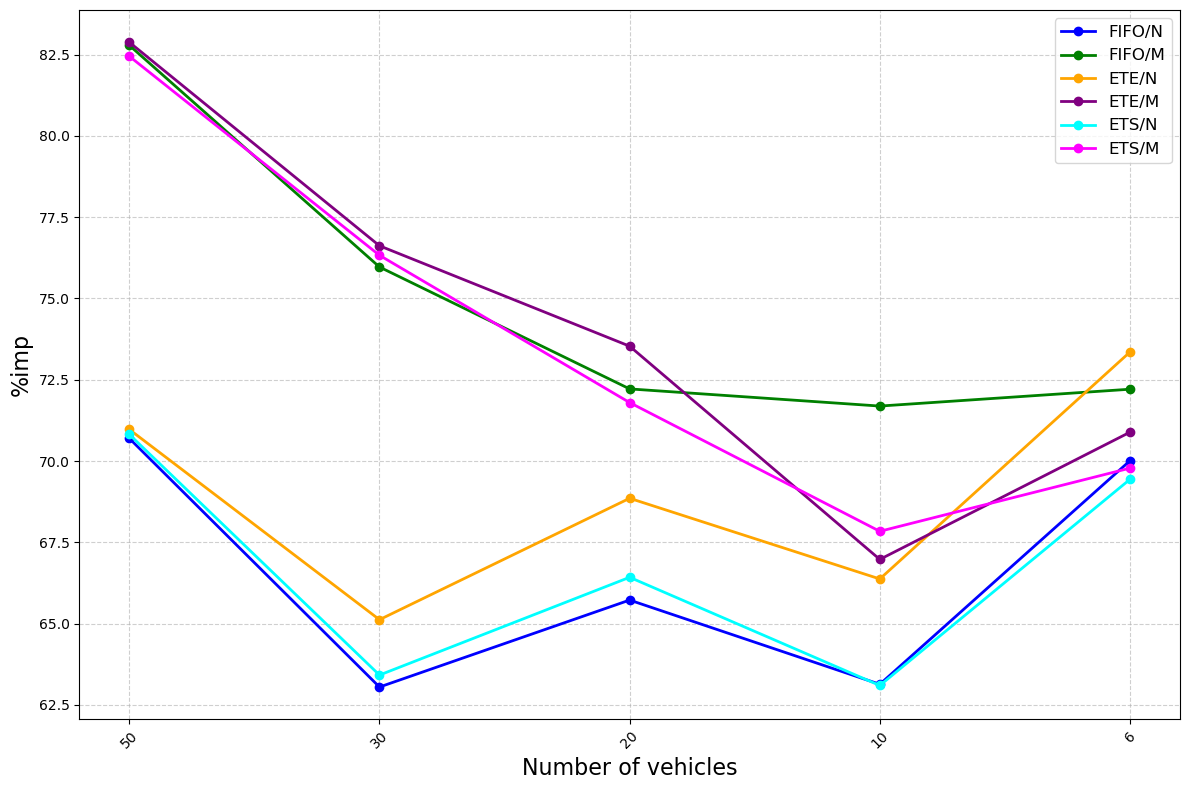

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths_heu = ['result_heuristic\\heu_200_50.csv', 'result_heuristic\\heu_200_30.csv', 'result_heuristic\\heu_200_20.csv', 'result_heuristic\\heu_200_10.csv', 'result_heuristic\\heu_200_6.csv']
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']  # Include all heuristics
file_paths_gp = ['result_gp\\gp_200_50.csv', 'result_gp\\gp_200_30.csv', 'result_gp\\gp_200_20.csv', 'result_gp\\gp_200_10.csv', 'result_gp\\gp_200_6.csv']
columns_to_read_gp = ['fgp']

# Define colors for each heuristic
colors = ['blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
heuristic_labels = ['FIFO/N', 'FIFO/M', 'ETE/N', 'ETE/M', 'ETS/N', 'ETS/M']  # Create labels for legend

# Create a single plot
plt.figure(figsize=(12, 8))

# Loop through each heuristic
for j, heuristic in enumerate(columns_to_read_heu):
    mean_improvements = []  # Store mean improvements for the current heuristic
    file_labels = []  # Labels for each file (e.g., 100_3, 100_5, etc.)
    
    # Loop through the file paths
    for i in range(len(file_paths_heu)):
        heu = pd.read_csv(file_paths_heu[i], usecols=[heuristic])
        gp = pd.read_csv(file_paths_gp[i], usecols=columns_to_read_gp)

        comparison_good = gp['fgp'] < heu[heuristic]
        percent_improve = ((heu[heuristic] - gp['fgp']) / heu[heuristic]) * 100

        # Select only the rows where GP is better than Heuristic
        percent_improve_good = percent_improve[comparison_good]

        if len(percent_improve_good) > 0:
            mean_percent_improve = percent_improve_good.mean()
        else:
            mean_percent_improve = 0

        # Store the mean improvement for the current heuristic
        mean_improvements.append(mean_percent_improve)

    # Extract the numbers after the second underscore and before '.csv'
    file_labels = [path.split('_')[-1].split('.')[0] for path in file_paths_heu]

    # Plot the percentage improvement for the current heuristic
    plt.plot(file_labels, mean_improvements, color=colors[j], marker='o', linestyle='-', linewidth=2, label=heuristic_labels[j])

# Add labels, title, and legend
plt.xlabel('Number of vehicles', fontsize=16)
plt.ylabel('%imp', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the combined plot
plt.tight_layout()


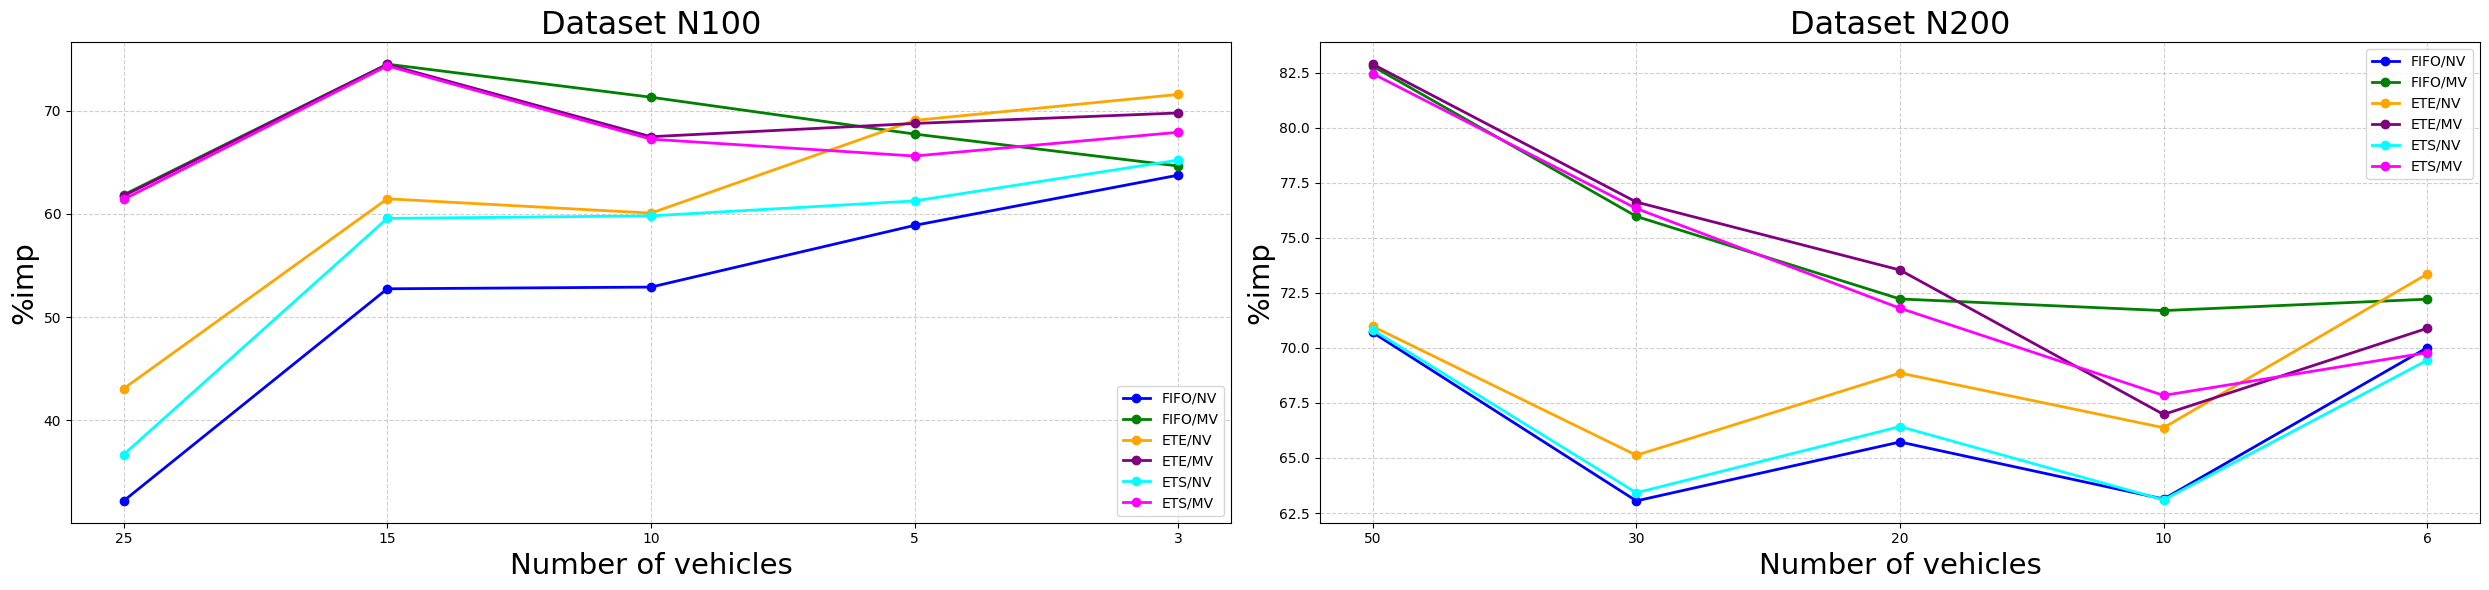

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths and settings for the two datasets
datasets = {
    "100": {
        "file_paths_heu": [
            "result_heuristic\\heu_100_25.csv",
            "result_heuristic\\heu_100_15.csv",
            "result_heuristic\\heu_100_10.csv",
            "result_heuristic\\heu_100_5.csv",
            "result_heuristic\\heu_100_3.csv",
        ],
        "file_paths_gp": [
            "result_gp\\gp_avg_100_25.csv",
            "result_gp\\gp_100_15.csv",
            "result_gp\\gp_100_10.csv",
            "result_gp\\gp_100_5.csv",
            "result_gp\\gp_100_3.csv",
        ],
        "x_labels": ["25", "15", "10", "5", "3"],  # Number of vehicles
    },
    "200": {
        "file_paths_heu": [
            "result_heuristic\\heu_200_50.csv",
            "result_heuristic\\heu_200_30.csv",
            "result_heuristic\\heu_200_20.csv",
            "result_heuristic\\heu_200_10.csv",
            "result_heuristic\\heu_200_6.csv",
        ],
        "file_paths_gp": [
            "result_gp\\gp_200_50.csv",
            "result_gp\\gp_200_30.csv",
            "result_gp\\gp_200_20.csv",
            "result_gp\\gp_200_10.csv",
            "result_gp\\gp_200_6.csv",
        ],
        "x_labels": ["50", "30", "20", "10", "6"],  # Number of vehicles
    },
}

columns_to_read_heu = [" fheu1", " fheu2", " fheu3", " fheu4", " fheu5", " fheu6"]
columns_to_read_gp = ["fgp"]

# Define colors for each heuristic
colors = ["blue", "green", "orange", "purple", "cyan", "magenta"]
heuristic_labels = ["FIFO/NV", "FIFO/MV", "ETE/NV", "ETE/MV", "ETS/NV", "ETS/MV"]

# Create subplots (2 subplots side by side)
fig, axs = plt.subplots(1, 2, figsize=(25, 6))

# Loop through each dataset (100 and 200)
for idx, (dataset_label, dataset) in enumerate(datasets.items()):
    ax = axs[idx]  # Select the correct axis (ax[0] for "100" and ax[1] for "200")
    file_paths_heu = dataset["file_paths_heu"]
    file_paths_gp = dataset["file_paths_gp"]
    x_labels = dataset["x_labels"]
    
    # Loop through each heuristic
    for j, heuristic in enumerate(columns_to_read_heu):
        mean_improvements = []  # Store mean improvements for the current heuristic
        
        # Loop through the file paths
        for i in range(len(file_paths_heu)):
            heu = pd.read_csv(file_paths_heu[i], usecols=[heuristic])
            gp = pd.read_csv(file_paths_gp[i], usecols=columns_to_read_gp)

            comparison_good = gp["fgp"] < heu[heuristic]
            percent_improve = ((heu[heuristic] - gp["fgp"]) / heu[heuristic]) * 100

            # Select only the rows where GP is better than Heuristic
            percent_improve_good = percent_improve[comparison_good]

            if len(percent_improve_good) > 0:
                mean_percent_improve = percent_improve_good.mean()
            else:
                mean_percent_improve = 0

            # Store the mean improvement for the current heuristic
            mean_improvements.append(mean_percent_improve)

        # Plot the percentage improvement for the current heuristic on the correct subplot
        linestyle = "-"  # Differentiate datasets by linestyle
        ax.plot(
            x_labels,
            mean_improvements,
            color=colors[j],
            marker="o",
            linestyle=linestyle,
            linewidth=2,
            label=f"{heuristic_labels[j]}",
        )

    # Set labels, title, and grid for the subplot
    ax.set_xlabel("Number of vehicles", fontsize=21)
    ax.set_ylabel("%imp", fontsize=21)
    ax.set_title(f"Dataset N{dataset_label}", fontsize=23)
    ax.grid(True, linestyle="--", alpha=0.6)

    # Add legend for the current subplot
    ax.legend(fontsize=10)

# Adjust layout for the subplots to fit them into one figure
plt.tight_layout()
fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')
plt.show()


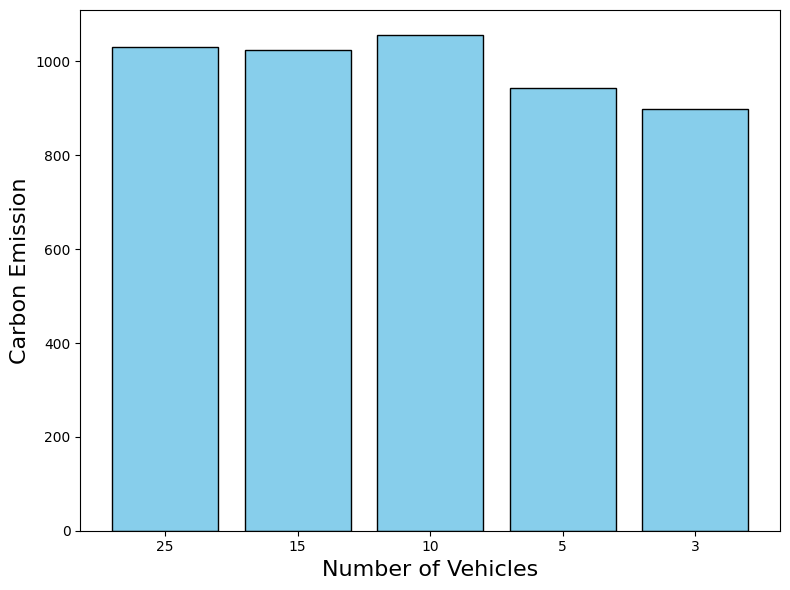

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths and columns to read
file_paths_gp = ['result_gp\\gp_avg_100_25.csv', 'result_gp\\gp_100_15.csv', 'result_gp\\gp_100_10.csv', 'result_gp\\gp_100_5.csv', 'result_gp\\gp_100_3.csv']
columns_to_read_gp = [' carbon']

# Initialize an empty list to store carbon emission values
carbon_emissions = []

# Loop through the file paths and extract carbon emissions
for file_path in file_paths_gp:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions.append(gp[' carbon'].mean())  # Assuming you want the average carbon emission for each file

# Define the x labels (number of vehicles)
vehicle_numbers = ['25', '15', '10', '5', '3']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(vehicle_numbers, carbon_emissions, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Number of Vehicles', fontsize=16)
plt.ylabel('Carbon Emission', fontsize=16)
# plt.title('Carbon Emission vs Number of Vehicles', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


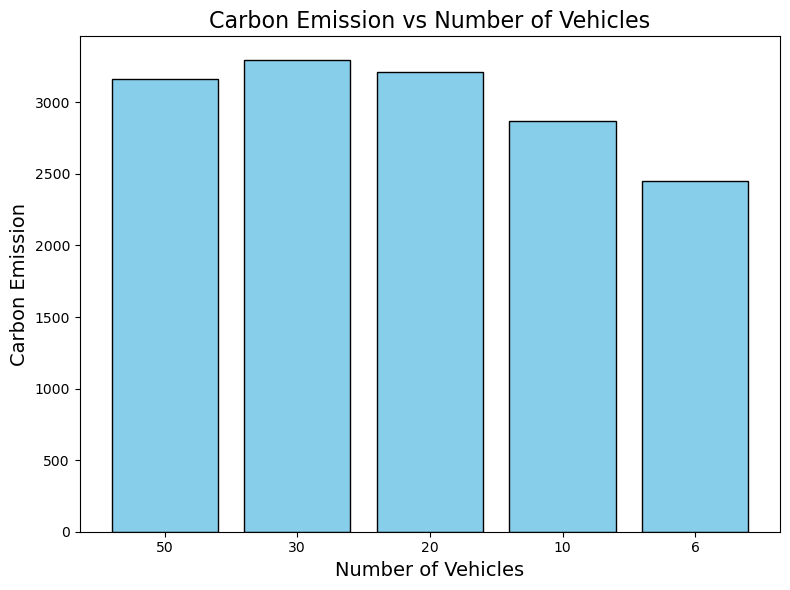

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths and columns to read
file_paths_gp = ['result_gp\\gp_200_50.csv', 'result_gp\\gp_200_30.csv', 'result_gp\\gp_200_20.csv', 'result_gp\\gp_200_10.csv', 'result_gp\\gp_200_6.csv']
columns_to_read_gp = [' carbon']

# Initialize an empty list to store carbon emission values
carbon_emissions = []

# Loop through the file paths and extract carbon emissions
for file_path in file_paths_gp:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions.append(gp[' carbon'].mean())  # Assuming you want the average carbon emission for each file

# Define the x labels (number of vehicles)
vehicle_numbers = ['50', '30', '20', '10', '6']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(vehicle_numbers, carbon_emissions, color='skyblue', edgecolor='black')

# Set labels and title
plt.xlabel('Number of Vehicles', fontsize=14)
plt.ylabel('Carbon Emission', fontsize=14)
plt.title('Carbon Emission vs Number of Vehicles', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


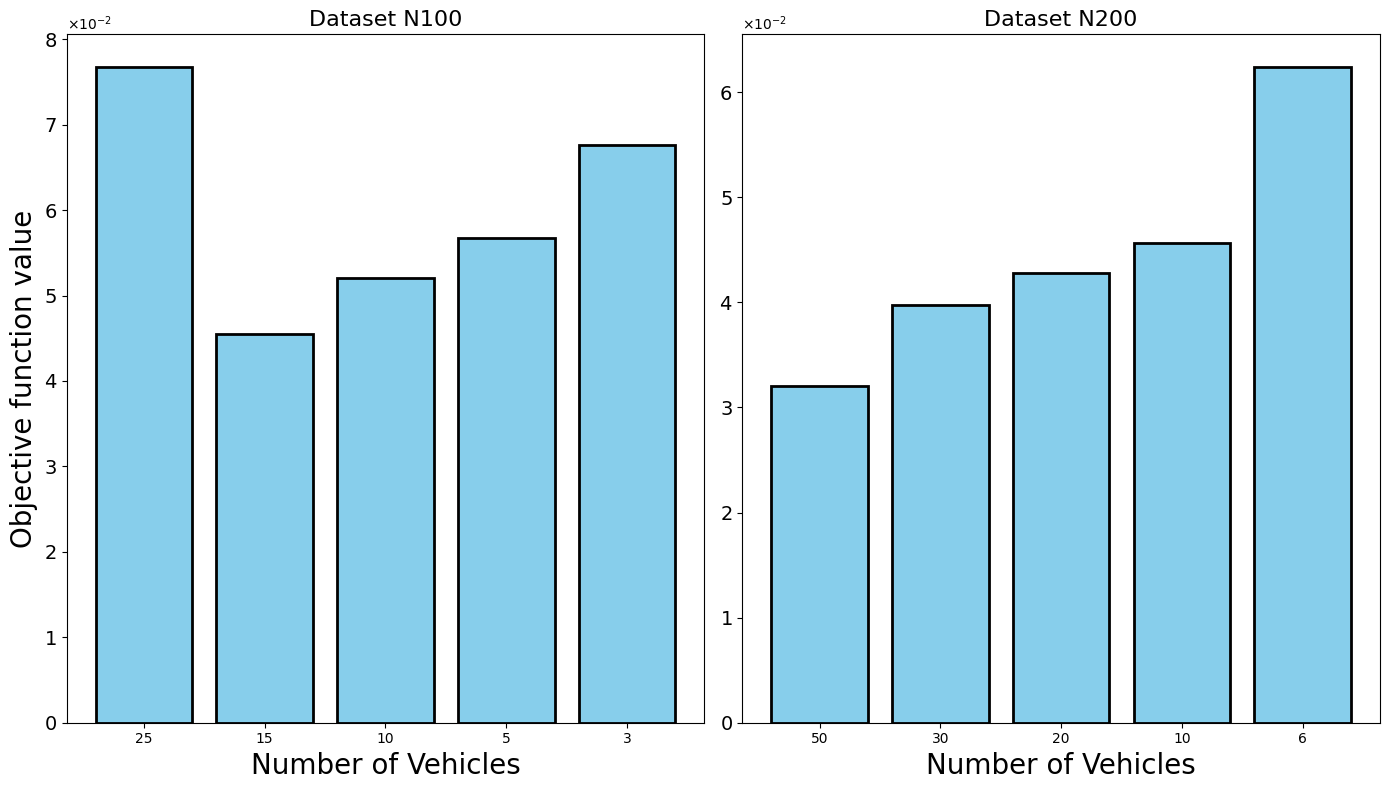

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# File paths and columns to read
file_paths_gp_100 = ['result_gp\\gp_avg_100_25.csv', 'result_gp\\gp_100_15.csv', 'result_gp\\gp_100_10.csv', 'result_gp\\gp_100_5.csv', 'result_gp\\gp_100_3.csv']
file_paths_gp_200 = ['result_gp\\gp_200_50.csv', 'result_gp\\gp_200_30.csv', 'result_gp\\gp_200_20.csv', 'result_gp\\gp_200_10.csv', 'result_gp\\gp_200_6.csv']
columns_to_read_gp = ['fgp']

# Initialize empty lists to store carbon emission values
carbon_emissions_100 = []
carbon_emissions_200 = []

# Loop through the file paths for the 100 vehicle data and extract carbon emissions
for file_path in file_paths_gp_100:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions_100.append(gp['fgp'].mean())  # Average carbon emission for each file

# Loop through the file paths for the 200 vehicle data and extract carbon emissions
for file_path in file_paths_gp_200:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions_200.append(gp['fgp'].mean())  # Average carbon emission for each file

# Define the x labels for the two sets of data (number of vehicles)
vehicle_numbers_100 = ['25', '15', '10', '5', '3']
vehicle_numbers_200 = ['50', '30', '20', '10', '6']

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Adjust the figsize as needed

# Plot for 100 vehicle data
axes[0].bar(vehicle_numbers_100, carbon_emissions_100, color='skyblue', edgecolor='black', linewidth=2)  # Increased linewidth
axes[0].set_xlabel('Number of Vehicles', fontsize=20)
axes[0].set_ylabel('Objective function value', fontsize=20)
axes[0].set_title('Dataset N100', fontsize=16)
axes[0].tick_params(axis='y', labelsize=14)

# Plot for 200 vehicle data
axes[1].bar(vehicle_numbers_200, carbon_emissions_200, color='skyblue', edgecolor='black', linewidth=2)  # Increased linewidth
axes[1].set_xlabel('Number of Vehicles', fontsize=20)
# axes[1].set_ylabel('Objective function value', fontsize=18)
axes[1].set_title('Dataset N200', fontsize=16)
axes[1].tick_params(axis='y', labelsize=14)

# Apply scientific notation to y-axis with powers of 10 next to the numbers
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))

# Apply the formatter to both axes
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

# Adjust layout for better spacing between plots
plt.tight_layout()

fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')
# Show the combined figure with two independent plots
plt.show()


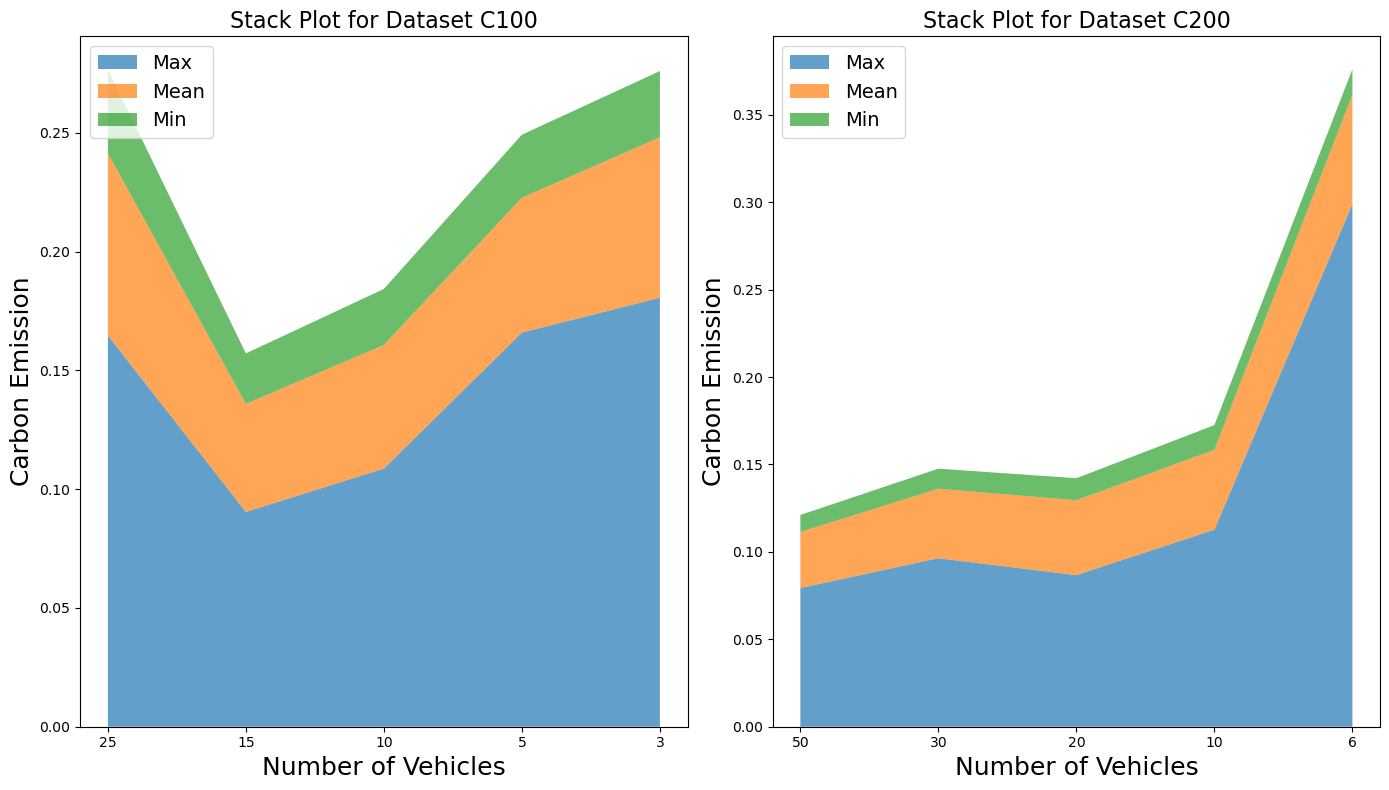

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths and columns to read
file_paths_gp_100 = ['result_gp\\gp_avg_100_25.csv', 'result_gp\\gp_100_15.csv', 'result_gp\\gp_100_10.csv', 'result_gp\\gp_100_5.csv', 'result_gp\\gp_100_3.csv']
file_paths_gp_200 = ['result_gp\\gp_200_50.csv', 'result_gp\\gp_200_30.csv', 'result_gp\\gp_200_20.csv', 'result_gp\\gp_200_10.csv', 'result_gp\\gp_200_6.csv']
columns_to_read_gp = ['fgp']

# Initialize empty lists to store carbon emission values
carbon_emissions_100 = []
carbon_emissions_200 = []

# Loop through the file paths for the 100 vehicle data and extract carbon emissions
for file_path in file_paths_gp_100:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions_100.append(gp['fgp'].values)  # Store carbon emission values for each file

# Loop through the file paths for the 200 vehicle data and extract carbon emissions
for file_path in file_paths_gp_200:
    gp = pd.read_csv(file_path, usecols=columns_to_read_gp)
    carbon_emissions_200.append(gp['fgp'].values)  # Store carbon emission values for each file

# Define the x labels for the two sets of data (number of vehicles)
vehicle_numbers_100 = ['25', '15', '10', '5', '3']
vehicle_numbers_200 = ['50', '30', '20', '10', '6']

# Compute max, mean, and min for each set of vehicle numbers
max_100 = [np.max(carbon_emissions) for carbon_emissions in carbon_emissions_100]
mean_100 = [np.mean(carbon_emissions) for carbon_emissions in carbon_emissions_100]
min_100 = [np.min(carbon_emissions) for carbon_emissions in carbon_emissions_100]

max_200 = [np.max(carbon_emissions) for carbon_emissions in carbon_emissions_200]
mean_200 = [np.mean(carbon_emissions) for carbon_emissions in carbon_emissions_200]
min_200 = [np.min(carbon_emissions) for carbon_emissions in carbon_emissions_200]

# Stack the values for plotting
y_100 = np.vstack([max_100, mean_100, min_100])
y_200 = np.vstack([max_200, mean_200, min_200])

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot for 100 vehicle data (stack plot)
axes[0].stackplot(vehicle_numbers_100, y_100, labels=['Max', 'Mean', 'Min'], alpha=0.7)
axes[0].set_xlabel('Number of Vehicles', fontsize=18)
axes[0].set_ylabel('Carbon Emission', fontsize=18)
axes[0].set_title('Stack Plot for Dataset C100', fontsize=16)
axes[0].legend(loc='upper left', fontsize=14)

# Plot for 200 vehicle data (stack plot)
axes[1].stackplot(vehicle_numbers_200, y_200, labels=['Max', 'Mean', 'Min'], alpha=0.7)
axes[1].set_xlabel('Number of Vehicles', fontsize=18)
axes[1].set_ylabel('Carbon Emission', fontsize=18)
axes[1].set_title('Stack Plot for Dataset C200', fontsize=16)
axes[1].legend(loc='upper left', fontsize=14)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the combined figure with two independent stack plots
plt.show()


#### table

In [1]:
import pandas as pd


file_path = 'result_heuristic\heu_200_50.csv'
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
heu_200 = pd.read_csv(file_path, usecols=columns_to_read_heu)
print(heu_200.head())

file_path = 'result_gp\gp_200_50.csv'
columns_to_read = [' fgp']
gp_200 = pd.read_csv(file_path, usecols=columns_to_read)
print(gp_200.head())
# Define row ranges
ranges = {
    "line 1-9": range(0, 10),     
    "line 10-17": range(10, 20),     
    "line 18-29": range(20, 30),    
    "line 30-40": range(30, 40),
    "line 41-48": range(40, 50),
    "line 49-56": range(50, 60)
}
# ranges = {
#     "line 1-9": range(0, 17),       
#     "line 18-29": range(17, 40),   
#     "line 41-48": range(40, 56)
# }
# ranges = {
#     "line 1-56": range(0, 56)    
# }

# Iterate over each column in data
for name in columns_to_read_heu:
    print(f"Column: {name}")
    
    # For each range of lines (rows)
    for range_name, row_range in ranges.items():
        # Select the rows within the current range for the column
        data_range = heu_200[name].iloc[row_range]
        avg_range = gp_200[' fgp'][row_range]  # Use standard indexing for NumPy arrays
        
        # Compare avg_values with the current column's values for the specific range
        comparison_bad = avg_range > data_range
        comparison_equal = avg_range == data_range
        comparison_good = avg_range < data_range
        
        # Count how many values in avg are smaller, equal, or greater
        count_bad = comparison_bad.sum()  # Boolean sum gives count of True values
        count_equal = comparison_equal.sum()
        count_good = comparison_good.sum()
        
        # Calculate percentage improvement for good comparisons
        percent_improve = ((data_range - avg_range) / data_range) * 100
        percent_improve_good = percent_improve[comparison_good]
        
        # Calculate mean of improvements if there are any good comparisons
        mean_percent_improve = percent_improve_good.mean() if not percent_improve_good.empty else 0
        
        # Print the results for the current range and column
        print(f"  {range_name}: good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")
    
    print("-" * 50)


      fheu1     fheu2     fheu3     fheu4     fheu5     fheu6
0  0.068120  0.195087  0.109793  0.229292  0.167120  0.187566
1  0.075251  0.196631  0.077726  0.196766  0.041015  0.203845
2  0.166140  0.188690  0.174112  0.187702  0.145977  0.188577
3  0.037318  0.188518  0.051311  0.186158  0.036705  0.186920
4  0.041925  0.190332  0.039357  0.193335  0.022897  0.190998
        fgp
0  0.047239
1  0.009788
2  0.009915
3  0.009692
4  0.044231
Column:  fheu1
  line 1-9: good: 9 / equal: 0 / bad: 1 / mean improvement: 62.21%
  line 10-17: good: 8 / equal: 0 / bad: 2 / mean improvement: 67.90%
  line 18-29: good: 10 / equal: 0 / bad: 0 / mean improvement: 85.52%
  line 30-40: good: 9 / equal: 0 / bad: 1 / mean improvement: 73.79%
  line 41-48: good: 9 / equal: 0 / bad: 1 / mean improvement: 62.97%
  line 49-56: good: 8 / equal: 0 / bad: 2 / mean improvement: 69.74%
--------------------------------------------------
Column:  fheu2
  line 1-9: good: 10 / equal: 0 / bad: 0 / mean improvement: 8

In [34]:
import pandas as pd

# Load heuristic and proposed algorithm data
file_path_heu = 'result_heuristic/heu_200_50.csv'
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
heu_200 = pd.read_csv(file_path_heu, usecols=columns_to_read_heu)

file_path_gp = 'result_gp/gp_200_50.csv'
columns_to_read_gp = [' fgp']
gp_200 = pd.read_csv(file_path_gp, usecols=columns_to_read_gp)

# Define row ranges
ranges = {
    "C1": range(0, 10),     
    "C2": range(10, 20),     
    "R1": range(20, 30),    
    "R2": range(30, 40),
    "RC1": range(40, 50),
    "RC2": range(50, 60)
}

# Initialize dictionary to store improvements
improvements_200 = {range_name: [] for range_name in ranges.keys()}

# Iterate over each range
for range_name, row_range in ranges.items():
    print(f"Range: {range_name}")
    
    total_good_count = 0
    total_equal_count = 0
    total_bad_count = 0
    total_mean_improvement = 0

    # List to accumulate mean improvements across heuristics for each range
    mean_improvements_per_range = []

    # Calculate the % improvement for each heuristic and aggregate results
    for name in columns_to_read_heu:
        data_range = heu_200[name].iloc[row_range]
        avg_range = gp_200[' fgp'][row_range]
        
        # Perform comparisons
        comparison_good = avg_range < data_range
        comparison_equal = avg_range == data_range
        comparison_bad = avg_range > data_range

        # Count instances
        count_good = comparison_good.sum()
        count_equal = comparison_equal.sum()
        count_bad = comparison_bad.sum()

        # Calculate the % improvement for good comparisons only
        percent_improve = ((data_range - avg_range) / data_range) * 100
        mean_percent_improve = percent_improve[comparison_good].mean() if count_good > 0 else 0

        # Add to the list for this range
        mean_improvements_per_range.append(mean_percent_improve)

    # Calculate the average mean improvement across all heuristics for the current range
    avg_mean_improvement = sum(mean_improvements_per_range) / len(mean_improvements_per_range)

    # Append average mean improvement to improvements_200 for the current range
    improvements_200[range_name].extend(mean_improvements_per_range + [avg_mean_improvement])

    # Print the results for the current range
    print(f"  Good: {total_good_count} / Equal: {total_equal_count} / Bad: {total_bad_count} / Mean % Improvement across heuristics: {avg_mean_improvement:.2f}%")
    print("-" * 50)

# Create DataFrame from improvements_200 dictionary
improvements_df_200 = pd.DataFrame({k: pd.Series(v) for k, v in improvements_200.items()})
improvements_df_200.index = [f"Heuristic {i+1}" for i in range(len(columns_to_read_heu))] + ["Mean"]

# Display the DataFrame
print(improvements_df_200)


Range: C1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 76.69%
--------------------------------------------------
Range: C2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 70.11%
--------------------------------------------------
Range: R1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 81.56%
--------------------------------------------------
Range: R2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 76.24%
--------------------------------------------------
Range: RC1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 77.32%
--------------------------------------------------
Range: RC2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 77.55%
--------------------------------------------------
                    C1         C2         R1         R2        RC1        RC2
Heuristic 1  62.211064  67.898578  85.519013  73.787270  62.970565  69.736600
Heuristic 2  8

In [32]:
import pandas as pd

# Load heuristic and proposed algorithm data
file_path_heu = 'result_heuristic\heu_100_25.csv'
columns_to_read_heu = [' fheu1', ' fheu2', ' fheu3', ' fheu4', ' fheu5', ' fheu6']
heu_200 = pd.read_csv(file_path_heu, usecols=columns_to_read_heu)

file_path_gp = 'result_gp\gp_avg_100_25.csv'
columns_to_read_gp = ['fgp']
gp_200 = pd.read_csv(file_path_gp, usecols=columns_to_read_gp)

# Define row ranges
ranges = {
    "C1": range(0, 9),
    "C2": range(9, 17),
    "R1": range(17, 29),
    "R2": range(29, 40),
    "RC1": range(40, 48),
    "RC2": range(48, 56)
}

# Initialize dictionary to store improvements
improvements_100 = {range_name: [] for range_name in ranges.keys()}

# Iterate over each range
for range_name, row_range in ranges.items():
    print(f"Range: {range_name}")
    
    total_good_count = 0
    total_equal_count = 0
    total_bad_count = 0
    total_mean_improvement = 0

    # List to accumulate mean improvements across heuristics for each range
    mean_improvements_per_range = []

    # Calculate the % improvement for each heuristic and aggregate results
    for name in columns_to_read_heu:
        data_range = heu_200[name].iloc[row_range]
        avg_range = gp_200['fgp'][row_range]
        
        # Perform comparisons
        comparison_good = avg_range < data_range
        comparison_equal = avg_range == data_range
        comparison_bad = avg_range > data_range

        # Count instances
        count_good = comparison_good.sum()
        count_equal = comparison_equal.sum()
        count_bad = comparison_bad.sum()

        # Calculate the % improvement for good comparisons only
        percent_improve = ((data_range - avg_range) / data_range) * 100
        mean_percent_improve = percent_improve[comparison_good].mean() if count_good > 0 else 0

        # Add to the list for this range
        mean_improvements_per_range.append(mean_percent_improve)

    # Calculate the average mean improvement across all heuristics for the current range
    avg_mean_improvement = sum(mean_improvements_per_range) / len(mean_improvements_per_range)

    # Append average mean improvement to improvements_200 for the current range
    improvements_100[range_name].extend(mean_improvements_per_range + [avg_mean_improvement])

    # Print the results for the current range
    print(f"  Good: {total_good_count} / Equal: {total_equal_count} / Bad: {total_bad_count} / Mean % Improvement across heuristics: {avg_mean_improvement:.2f}%")
    print("-" * 50)

# Create DataFrame from improvements_200 dictionary
improvements_df_100 = pd.DataFrame({k: pd.Series(v) for k, v in improvements_100.items()})
improvements_df_100.index = [f"Heuristic {i+1}" for i in range(len(columns_to_read_heu))] + ["Mean"]

# Display the DataFrame
print(improvements_df_100)


Range: C1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 55.44%
--------------------------------------------------
Range: C2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 44.76%
--------------------------------------------------
Range: R1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 53.33%
--------------------------------------------------
Range: R2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 45.32%
--------------------------------------------------
Range: RC1
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 47.43%
--------------------------------------------------
Range: RC2
  Good: 0 / Equal: 0 / Bad: 0 / Mean % Improvement across heuristics: 47.15%
--------------------------------------------------
                    C1         C2         R1         R2        RC1        RC2
Heuristic 1  45.378936  15.319815  51.167897  15.812843  33.922604  12.299243
Heuristic 2  6

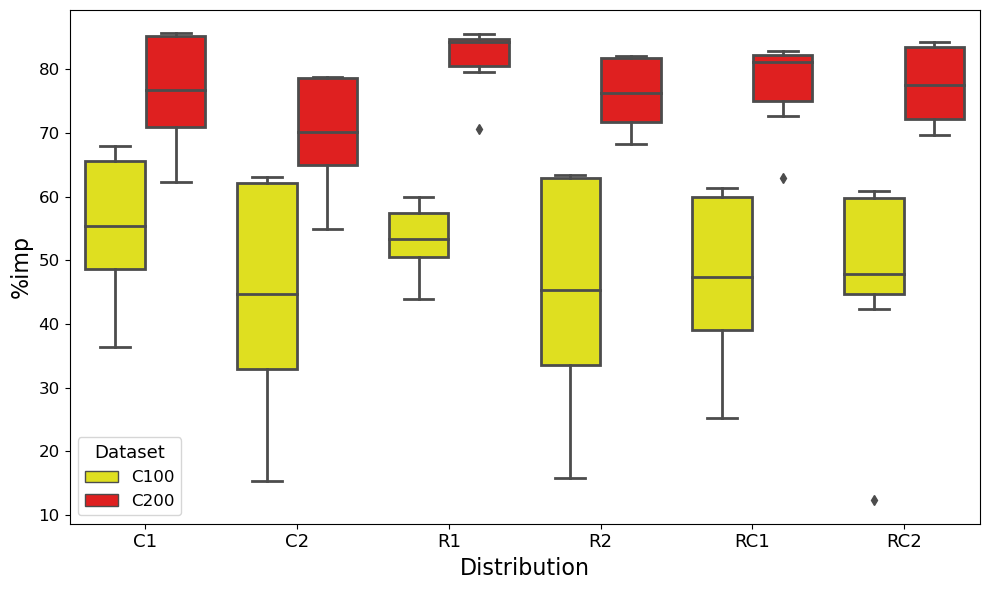

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated improvements for both heu_100/gp_100 and heu_200/gp_200

# Define row ranges (already provided)
ranges = {
    "C1": range(0, 9),
    "C2": range(9, 17),
    "R1": range(17, 29),
    "R2": range(29, 40),
    "RC1": range(40, 48),
    "RC2": range(48, 56)
}



# Convert the improvements dictionaries into DataFrames for easier plotting
improvements_df_100 = pd.DataFrame({k: pd.Series(v) for k, v in improvements_100.items()})
improvements_df_200 = pd.DataFrame({k: pd.Series(v) for k, v in improvements_200.items()})

# Melt the dataframes to create a long-form DataFrame for Seaborn
improvements_df_100_melt = improvements_df_100.melt(var_name='Distribution', value_name='Improvement')
improvements_df_100_melt['Type'] = 'C100'

improvements_df_200_melt = improvements_df_200.melt(var_name='Distribution', value_name='Improvement')
improvements_df_200_melt['Type'] = 'C200'

# Concatenate the two melted DataFrames for combined plotting
combined_df = pd.concat([improvements_df_100_melt, improvements_df_200_melt])

# Plot the boxplot with both 100 and 200 request data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distribution', y='Improvement', hue='Type', data=combined_df, palette=['yellow', 'red'], linewidth=2)

plt.ylabel("%imp", fontsize=16)
plt.xlabel("Distribution", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)

# Adjust the legend
plt.legend(title="Dataset", fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


### compare with DACO

In [13]:
import pandas as pd

# Read the CSV file
file_path = '200_compare.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Find the 'avg' row and extract its values
avg = df['DACO']

# Print the result
print(avg)

# Correctly escape backslashes in the file path or use raw string notation
file_path = 'result_gp\gp_200_50.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the modified DataFrame
print(df[' fgp'].head())



0     0.051894
1     0.035299
2     0.051939
3     0.039147
4     0.029682
        ...   
57    0.046504
58    0.041990
59    0.039839
60         NaN
61         NaN
Name: DACO, Length: 62, dtype: float64
0    0.047239
1    0.009788
2    0.009915
3    0.009692
4    0.044231
Name:  fgp, dtype: float64


In [16]:
# Define row ranges
ranges = {
    "line 1-9": range(0, 10),     
    "line 10-17": range(10, 20),     
    "line 18-29": range(20, 30),    
    "line 30-40": range(30, 40),
    "line 41-48": range(40, 50),
    "line 49-56": range(50, 60)
}
# ranges = {
#     "line 1-9": range(0, 9),     
#     "line 10-17": range(9, 17),     
#     "line 18-29": range(17, 29),    
#     "line 30-40": range(29, 40),
#     "line 41-48": range(40, 48),
#     "line 49-56": range(48, 56)
# }
# ranges = {
#     "line 1-9": range(0, 17),       
#     "line 18-29": range(17, 40),   
#     "line 41-48": range(40, 56)
# }
# ranges = {
#     "line 1-56": range(0, 56)    
# }
    
# For each range of lines (rows)
for range_name, row_range in ranges.items():
    # Select the rows within the current range for the column
    data_range = avg[row_range]
    avg_range = df[' fgp'][row_range]  # Use standard indexing for NumPy arrays
    
    # Compare avg_values with the current column's values for the specific range
    comparison_bad = avg_range > data_range
    comparison_equal = avg_range == data_range
    comparison_good = avg_range < data_range
    
    # Count how many values in avg are smaller, equal, or greater
    count_bad = comparison_bad.sum()  # Boolean sum gives count of True values
    count_equal = comparison_equal.sum()
    count_good = comparison_good.sum()
    
    # Calculate percentage improvement for good comparisons
    percent_improve = ((data_range - avg_range) / data_range) * 100
    percent_improve_good = percent_improve[comparison_good]
    
    # Calculate mean of improvements if there are any good comparisons
    mean_percent_improve = percent_improve_good.mean() if not percent_improve_good.empty else 0
    
    # Print the results for the current range and column
    print(f"  {range_name}: good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")

print("-" * 50)


  line 1-9: good: 8 / equal: 0 / bad: 2 / mean improvement: 49.09%
  line 10-17: good: 5 / equal: 0 / bad: 5 / mean improvement: 56.72%
  line 18-29: good: 7 / equal: 0 / bad: 3 / mean improvement: 64.35%
  line 30-40: good: 8 / equal: 0 / bad: 2 / mean improvement: 42.20%
  line 41-48: good: 4 / equal: 0 / bad: 6 / mean improvement: 53.86%
  line 49-56: good: 8 / equal: 0 / bad: 2 / mean improvement: 40.75%
--------------------------------------------------


In [4]:
comparison_bad = df['Last Line'] > avg
comparison_equal = df['Last Line'] == avg
comparison_good = df['Last Line'] < avg

# Count how many values in avg are smaller than corresponding values in the current column
count_bad = sum(comparison_bad)
count_equal = sum(comparison_equal)
count_good = sum(comparison_good)

# Calculate percentage improvement for good comparisons
percent_improve = ((avg - df['Last Line']) / avg) * 100
# Filter only for good comparisons where avg is smaller
percent_improve_good = percent_improve[comparison_good]

# If there are any improvements, calculate the mean of the improvements
if len(percent_improve_good) > 0:
    mean_percent_improve = percent_improve_good.mean()
else:
    mean_percent_improve = 0  # No improvements

print(f"good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")


good: 42 / equal: 0 / bad: 14 / mean improvement: 37.20%


In [4]:
import pandas as pd
import numpy as np

# Define file paths
file_paths = ['gp_result_80epoch.csv', 'gp_result_2_80epoch.csv', 'gp_result_3_80epoch.csv']

# Read all files and process 'Last Line' column
data_frames = []
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Ensure 'Last Line' column exists
    if 'Last Line' in df.columns:
        # Remove the trailing zero from the 'Last Line' column and convert to float
        df['Last Line'] = df['Last Line'].apply(lambda x: float(str(x).split()[0]))
        
        # Append the processed dataframe to the list
        data_frames.append(df['Last Line'])

# Concatenate all 'Last Line' columns into a single DataFrame
combined_df = pd.concat(data_frames, axis=1)

# Calculate the row-wise average
combined_df['Average'] = combined_df.mean(axis=1)

# Create a new DataFrame with the 'Average' column
result_df = pd.DataFrame({'Average': combined_df['Average']})

# Print the result
print(result_df)

# Optionally, save the result to a new CSV file
result_df.to_csv('average_result.csv', index=False)


        Average
0   1151.993180
1    529.477823
2   1060.712558
3   1100.259298
4    962.338846
5    905.947661
6   1429.708067
7   1526.463927
8   1691.737501
9   1067.871948
10   609.826497
11   600.062711
12   522.697204
13  1122.663311
14  1158.703000
15   687.575932
16  1705.003233
17  1097.828222
18   743.979545
19   871.392680
20  1448.781142
21  1046.509714
22   885.317693
23   645.784391
24   530.158120
25  1546.820182
26  1549.807241
27   693.827940
28  1019.192282
29   847.374191
30   587.520404
31  1232.743689
32   825.667583
33  1349.267667
34   857.278289
35  1183.036384
36  1053.247623
37  1229.872428
38   622.134187
39  1088.598782
40  1205.228361
41  1288.384134
42   569.611379
43   570.444750
44  1579.236545
45  1627.707980
46  1066.523048
47  1519.512810
48  1155.445682
49   646.207028
50   581.775505
51   573.629012
52  1739.525124
53  1155.917825
54   758.345955
55   911.970264


In [5]:
combined_df['Average']

0     1151.993180
1      529.477823
2     1060.712558
3     1100.259298
4      962.338846
5      905.947661
6     1429.708067
7     1526.463927
8     1691.737501
9     1067.871948
10     609.826497
11     600.062711
12     522.697204
13    1122.663311
14    1158.703000
15     687.575932
16    1705.003233
17    1097.828222
18     743.979545
19     871.392680
20    1448.781142
21    1046.509714
22     885.317693
23     645.784391
24     530.158120
25    1546.820182
26    1549.807241
27     693.827940
28    1019.192282
29     847.374191
30     587.520404
31    1232.743689
32     825.667583
33    1349.267667
34     857.278289
35    1183.036384
36    1053.247623
37    1229.872428
38     622.134187
39    1088.598782
40    1205.228361
41    1288.384134
42     569.611379
43     570.444750
44    1579.236545
45    1627.707980
46    1066.523048
47    1519.512810
48    1155.445682
49     646.207028
50     581.775505
51     573.629012
52    1739.525124
53    1155.917825
54     758.345955
55     911

In [6]:
import pandas as pd

# Read the CSV file
file_path = 'D:\HOCDIBANTRE\DVRP-hwng\\td_daco.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Find the 'avg' row and extract its values
avg_row = df[df.iloc[:, 0] == 'avg']

# If you want to get the numbers as a list, excluding the 'avg' label
avg = avg_row.iloc[0, 1:].values  # Skip the first column which contains 'avg'

# Print the result
print(avg)

comparison_bad = combined_df['Average'] > avg
comparison_equal = combined_df['Average'] == avg
comparison_good = combined_df['Average'] < avg

# Count how many values in avg are smaller than corresponding values in the current column
count_bad = sum(comparison_bad)
count_equal = sum(comparison_equal)
count_good = sum(comparison_good)

# Calculate percentage improvement for good comparisons
percent_improve = ((avg - combined_df['Average']) / avg) * 100
# Filter only for good comparisons where avg is smaller
percent_improve_good = percent_improve[comparison_good]

# If there are any improvements, calculate the mean of the improvements
if len(percent_improve_good) > 0:
    mean_percent_improve = percent_improve_good.mean()
else:
    mean_percent_improve = 0  # No improvements

print(f"good: {count_good} / equal: {count_equal} / bad: {count_bad} / mean improvement: {mean_percent_improve:.2f}%")


[1674.0199 1603.0466 1370.9129 1181.5943 1521.1308 1559.6744 1578.2791
 1524.9963 1317.0569 1369.456765 1249.524059 1130.434078 1046.036996
 1204.13758 1202.326614 1121.369375 1115.147259 1293.584785 1303.9681
 1068.9019 915.0386 1248.7091 1148.4944 1071.121 910.5548624 1027.088
 983.3059 1082.7784 903.3379 1452.1491 1354.9513 1202.3397 906.3779
 1297.6671 1241.1751 1126.6619 927.9083 1261.9994 1331.8469 1093.3617
 1696.436944 1581.299416 1386.48842 1005.978686 1494.473298 1533.533064
 1304.313138 1061.834199 1905.029257 1755.866079 1466.489777 1168.684076
 2009.447682 1772.076335 1787.740636 1415.698919]
good: 42 / equal: 0 / bad: 14 / mean improvement: 32.99%


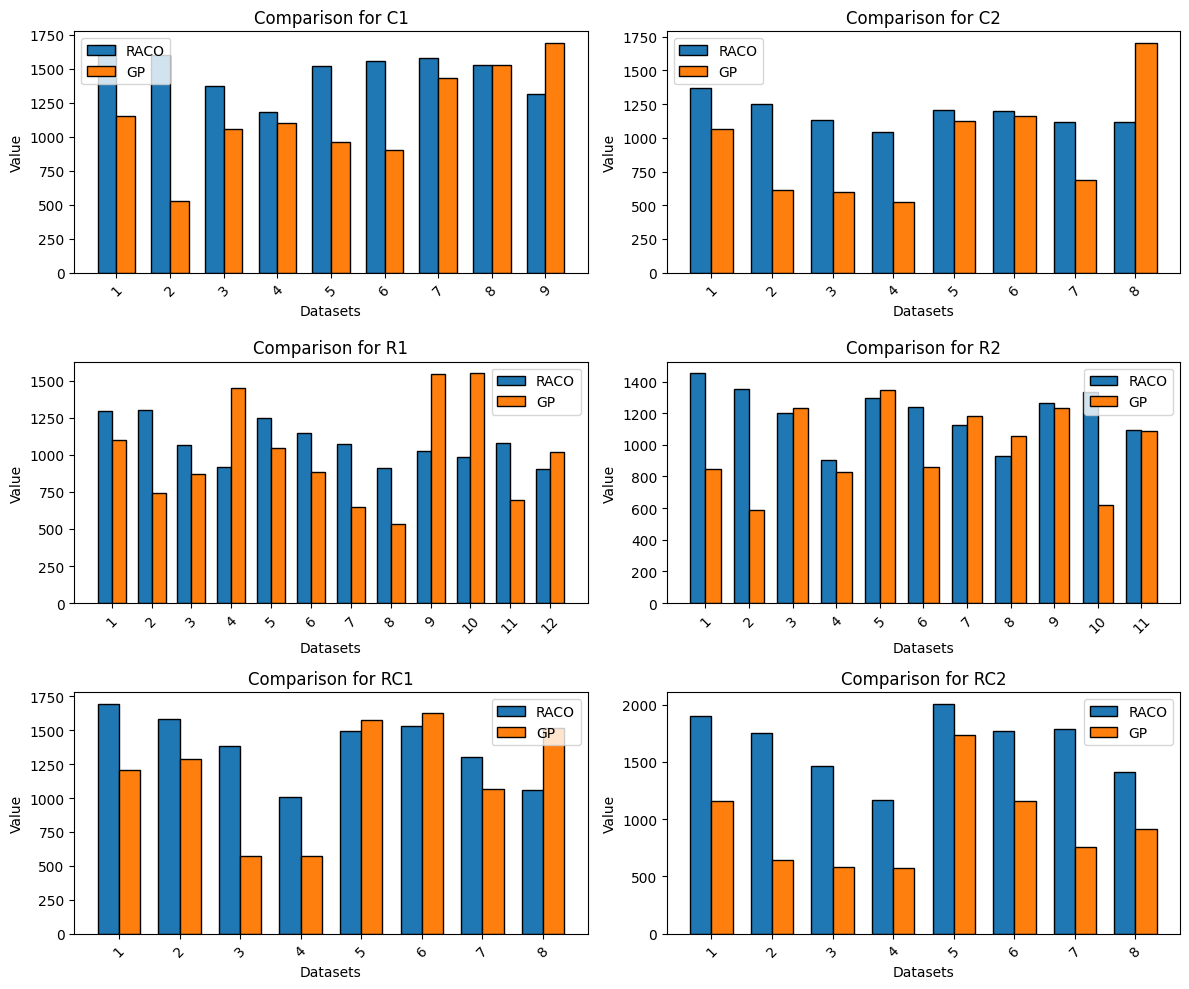

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming avg_value and avg_values are numpy arrays
# Replace with your actual data
avg_value = np.random.rand(56)  # Replace with actual avg_value data
avg_values = np.random.rand(56)  # Replace with actual avg_values data

# Define row ranges
ranges = {
    "C1": range(0, 9),       # Rows 0 to 8
    "C2": range(9, 17),      # Rows 9 to 16
    "R1": range(17, 29),     # Rows 17 to 28
    "R2": range(29, 40),     # Rows 29 to 39
    "RC1": range(40, 48),    # Rows 40 to 47
    "RC2": range(48, 56)     # Rows 48 to 55
}

# Create subplots for comparison
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# For each range of rows
for i, (range_name, row_range) in enumerate(ranges.items()):
    ax = axs[i // 2, i % 2]  # Select subplot
    data_range_value = avg[row_range]     # Values from avg_value
    data_range_values = combined_df['Average'][row_range]   # Values from avg_values

    # Create bar plot with black boundaries
    bar_width = 0.35
    index = np.arange(len(row_range))
    
    ax.bar(index, data_range_value, bar_width, label='RACO', edgecolor='black')
    ax.bar(index + bar_width, data_range_values, bar_width, label='GP', edgecolor='black')

    # Set title and labels
    ax.set_title(f'Comparison for {range_name}')
    ax.set_xlabel('Datasets')
    ax.set_ylabel('Value')
    
    # Customize x-axis labels with 'DatasetX'
    dataset_labels = [f'{i}' for i in range(1, len(row_range) + 1)]
    ax.set_xticks(index + bar_width / 2)  # Adjust ticks to be between the bars
    ax.set_xticklabels(dataset_labels, rotation=45)  # Rotate for better visibility
    
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display plot
plt.show()


### convergence

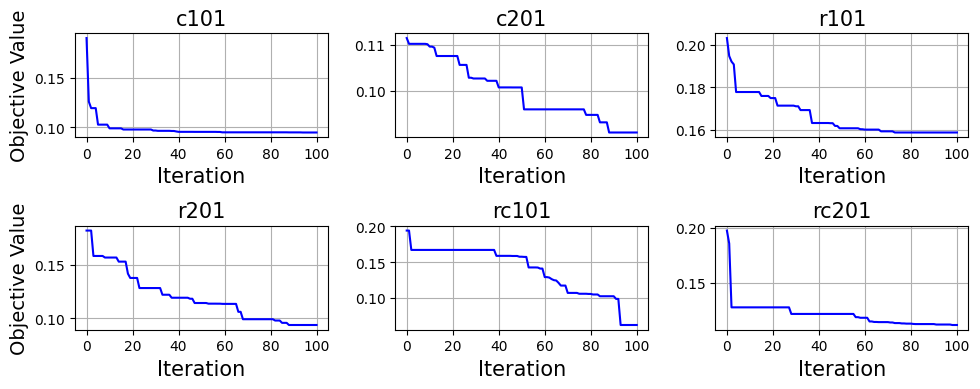

In [34]:
import os
import matplotlib.pyplot as plt
import math


folder_path = '200\\result_200\\50\data\\200'

# Get a list of all files in the folder
file_list = ['h200C1_2_1.csv','h200C2_2_6.csv','h200R1_2_5.csv','h200R2_2_1.csv','h200RC1_2_1.csv','h200RC2_2_1.csv']
title = ['c101','c201','r101','r201','rc101','rc201']
# Set up the subplot layout
num_files = len(file_list)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_files / cols)  # Number of rows, computed dynamically

# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 2))
axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration
# Iterate through each file in the folder
for i, file_name in enumerate(file_list): 
    file_path = os.path.join(folder_path, file_name)    
    fitness_values = []
    carbon_upper_value = None  # Variable to store the Carbon_upper value
    
    # Read the current file
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file):
            values = line.split()
            if line_num == 0 and values[0] == "Carbon_upper:":  # Check if it's the first line with Carbon_upper
                carbon_upper_value = float(values[1])  # Extract the value after "Carbon_upper:"
            elif values:  # For other lines with data
                fitness_value = float(values[0])  # Extract the first column as fitness value
                fitness_values.append(fitness_value/carbon_upper_value)
    
    # Plot the fitness values for the current file on the subplot
    axs[i].plot(fitness_values, linestyle='-', color='b')
    axs[i].set_title(f'{title[i]}', fontsize=15)
    axs[i].set_xlabel('Iteration',fontsize=15)
    axs[0].set_ylabel('Objective Value', fontsize=14)
    axs[3].set_ylabel('Objective Value', fontsize=14)
    axs[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')
# Show the combined figure
plt.show()


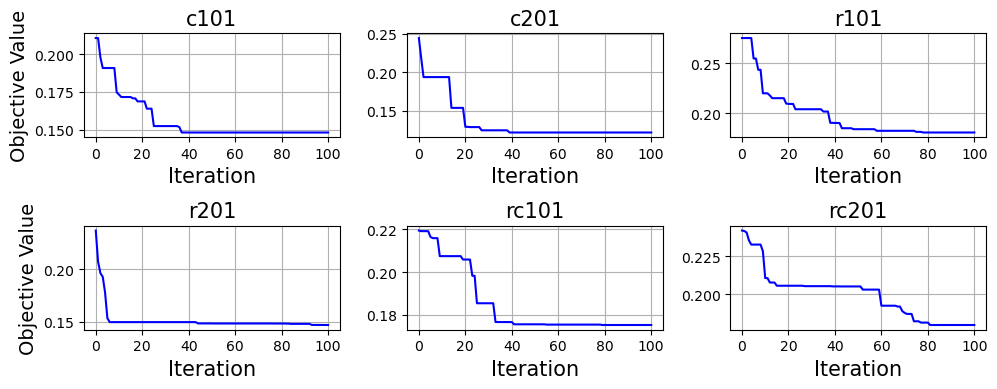

In [27]:
import os
import matplotlib.pyplot as plt
import math


folder_path = 'result_100_15\\100'

# Get a list of all files in the folder
file_list = ['h100c101.csv','h100c201.csv','h100r101.csv','h100r201.csv','h100rc101.csv','h100rc201.csv']

# Set up the subplot layout
num_files = len(file_list)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_files / cols)  # Number of rows, computed dynamically

# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(10, rows * 2))
axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration
# Iterate through each file in the folder
for i, file_name in enumerate(file_list): 
    file_path = os.path.join(folder_path, file_name)
    
    # Initialize an empty list to store the fitness values for the current file
    fitness_values = []
    
    fitness_values = []
    carbon_upper_value = None  # Variable to store the Carbon_upper value
    
    # Read the current file
    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file):
            values = line.split()
            if line_num == 0 and values[0] == "Carbon_upper:":  # Check if it's the first line with Carbon_upper
                carbon_upper_value = float(values[1])  # Extract the value after "Carbon_upper:"
            elif values:  # For other lines with data
                fitness_value = float(values[0])  # Extract the first column as fitness value
                fitness_values.append(fitness_value/carbon_upper_value)
    
    # Plot the fitness values for the current file on the subplot
    axs[i].plot(fitness_values, linestyle='-', color='b')
    axs[i].set_title(f'{file_name[4:-4]}',fontsize=15)
    axs[i].set_xlabel('Iteration',fontsize=15)
    axs[0].set_ylabel('Objective Value', fontsize=14)
    axs[3].set_ylabel('Objective Value', fontsize=14)
    axs[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
fig.savefig("plot_output.pdf", format='pdf', bbox_inches='tight')
# Show the combined figure
plt.show()

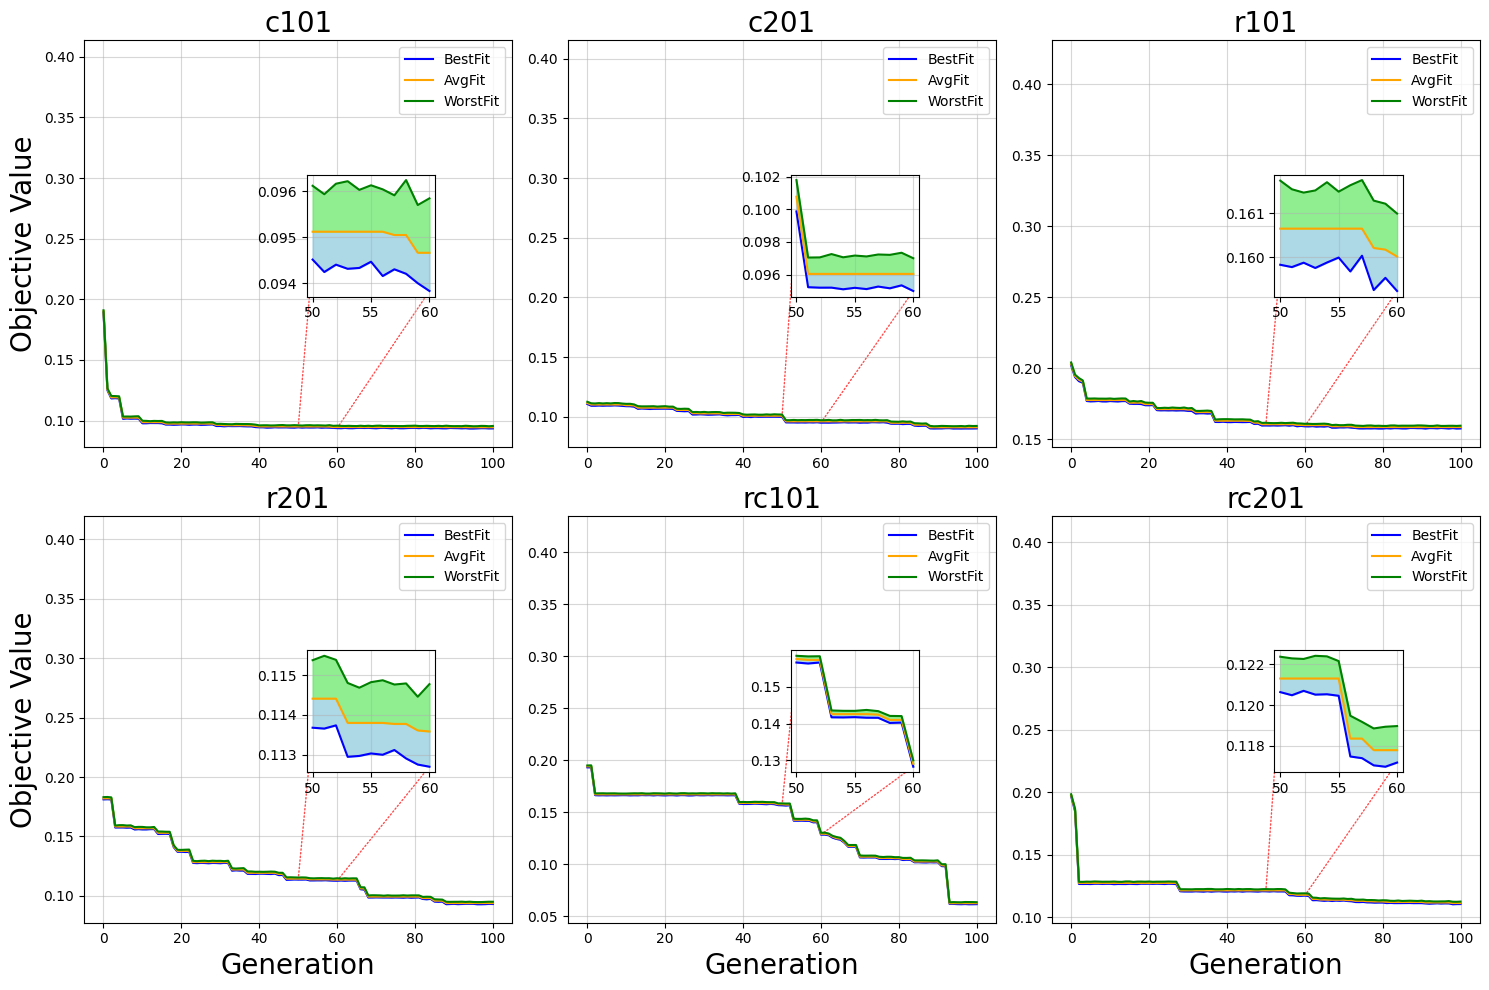

In [35]:
from matplotlib.patches import ConnectionPatch
import random
folder_path = '200\\result_200\\50\data\\200'

# Get a list of all files in the folder
file_list = ['h200C1_2_1.csv','h200C2_2_6.csv','h200R1_2_5.csv','h200R2_2_1.csv','h200RC1_2_1.csv','h200RC2_2_1.csv']
title = ['c101','c201','r101','r201','rc101','rc201']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Ensure subplots are created
axs = axs.flatten()  # Flatten the 2D axs array for easy iteration

for i, file_name in enumerate(file_list):
    file_path = os.path.join(folder_path, file_name)
    best_fitness, worst_fitness, mean_fitness = [], [], []
    carbon_upper_value = None

    with open(file_path, 'r') as file:
        for line_num, line in enumerate(file):
            values = line.split()
            if line_num == 0 and values[0] == "Carbon_upper:":
                carbon_upper_value = float(values[1])
            elif values:
                fitness_value = float(values[0])
                mean_fitness.append(fitness_value / carbon_upper_value)
                worst_fitness.append((fitness_value + random.uniform(40, 60)) / carbon_upper_value)
                best_fitness.append((fitness_value + random.uniform(-50, -30)) / carbon_upper_value)

    x = np.arange(len(mean_fitness))
    best_fitness, mean_fitness, worst_fitness = map(np.array, [best_fitness, mean_fitness, worst_fitness])

    # Plot main figure
    axs[i].fill_between(x, best_fitness, mean_fitness, color='lightblue', alpha=1)
    axs[i].fill_between(x, mean_fitness, worst_fitness, color='lightgreen', alpha=1)
    axs[i].plot(x, best_fitness, label='BestFit', color='blue')
    axs[i].plot(x, mean_fitness, label='AvgFit', color='orange')
    axs[i].plot(x, worst_fitness, label='WorstFit', color='green')
    axs[i].set_title(f'{title[i]}', fontsize=20)
    axs[3].set_xlabel('Generation', fontsize=20)
    axs[4].set_xlabel('Generation', fontsize=20)
    axs[5].set_xlabel('Generation', fontsize=20)
    axs[0].set_ylabel('Objective Value',fontsize=20)
    axs[3].set_ylabel('Objective Value',fontsize=20)
    axs[i].legend()
    axs[i].grid(alpha=0.5)

    # Add inset with zoom-out effect
    inset_ax = axs[i].inset_axes([0.52, 0.37, 0.3, 0.3])
    inset_ax.fill_between(x[50:61], best_fitness[50:61], mean_fitness[50:61], color='lightblue', alpha=1)
    inset_ax.fill_between(x[50:61], mean_fitness[50:61], worst_fitness[50:61], color='lightgreen', alpha=1)
    inset_ax.plot(x[50:61], best_fitness[50:61], color='blue')
    inset_ax.plot(x[50:61], mean_fitness[50:61], color='orange')
    inset_ax.plot(x[50:61], worst_fitness[50:61], color='green')
    inset_ax.grid(alpha=0.5)

    # Draw connection lines between inset and main plot
    con1 = ConnectionPatch(xyA=(50, best_fitness[50]), xyB=(50, best_fitness[50]),
                           coordsA=axs[i].transData, coordsB=inset_ax.transData,
                           color="red", linestyle=":", alpha=0.7)
    con2 = ConnectionPatch(xyA=(60, best_fitness[60]), xyB=(60, best_fitness[60]),
                           coordsA=axs[i].transData, coordsB=inset_ax.transData,
                           color="red", linestyle=":", alpha=0.7)

    axs[i].add_patch(con1)
    axs[i].add_patch(con2)

# Ensure layout is properly adjusted
plt.tight_layout()

# Save and display the plot
plt.savefig('output.pdf', bbox_inches='tight')
plt.show()
